# Results for Logistic Regression on Principal Components

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [5]:
import os
import pickle
import numpy as np
from scipy import sparse
from sklearn.externals import joblib
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from midi_ml.models.decomposition import PrincipalComponents
from midi_ml.models.linear_decision_rules import PenalizedLogisticRegression
from midi_ml.pipelines.midi_reads import MidiFeatureCorpus

In [6]:
labels = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_labels.pkl")
features = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_matrix.pkl")
features = features.todense()
bach_labels = [k for k in range(len(labels)) if labels[k] == "bach-js"]
mozart_labels = [k for k in range(len(labels)) if labels[k] == "mozart"]
X = features[bach_labels + mozart_labels].A
y = np.array([1 for i in range(len(bach_labels))] + [0 for i in range(len(mozart_labels))])
y = y.reshape((y.shape[0],))
del features

# How Many PCs to Keep?

In [71]:
bach_pc = PrincipalComponents(X[np.where(y == 1)[0], :], method="svd")
bach_pc.fit()
mozart_pc = PrincipalComponents(X[np.where(y == 0)[0], :], method="svd")
mozart_pc.fit()

In [8]:
import seaborn as sns

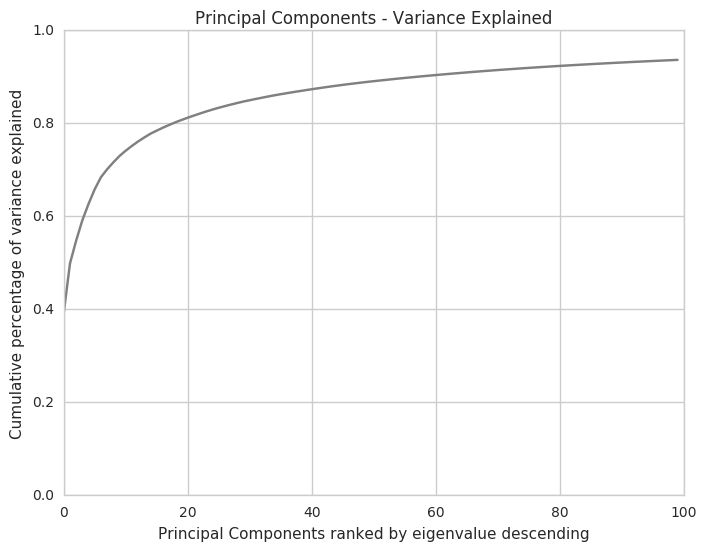

In [9]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.plot((pc.eigenvalues_.cumsum() / pc.eigenvalues_.sum())[:100],
        color="gray")
plt.ylim(0,1)
plt.ylabel("Cumulative percentage of variance explained")
plt.xlabel("Principal Components ranked by eigenvalue descending")
plt.title("Principal Components - Variance Explained")
plt.show()

In [ ]:
import mido, music21

In [18]:
m = MidiFeatureCorpus.initialize_note_sequence_set(2)

# Mozart

In [166]:
mozart_X = X[np.where(y==0)[0], :]

In [185]:
mozart_sampling_distribution = mozart_X.sum(axis=0) / mozart_X.sum()
mozart_sampling_distribution *= 0.99999
seqs = np.random.multinomial(1,
                      mozart_sampling_distribution, 16).argmax(axis=1)

In [186]:
mozart_s = music21.stream.Stream()
for seq in seqs:
    midi_locs = m[seq].split("|")
    for note in midi_locs:
        n = music21.note.Note(0)
        n.pitch.midi = int(note)
        n.duration = music21.duration.Duration(0.5)
        mozart_s.append([n])

In [193]:
[mozart_s[i].pitch.name for i in range(len(mozart_s))]

['C',
 'C',
 'G#',
 'G#',
 'D',
 'E',
 'F',
 'D',
 'E-',
 'E-',
 'C',
 'G',
 'E',
 'E',
 'D',
 'C',
 'G',
 'F',
 'B-',
 'B-',
 'C',
 'G#',
 'A',
 'A',
 'G',
 'B-',
 'G',
 'C#',
 'G',
 'F',
 'G',
 'A']

In [187]:
mozart_s.show("midi")

# Bach

In [178]:
bach_X = X[np.where(y==1)[0], :]

In [194]:
bach_sampling_distribution = bach_X.sum(axis=0) / bach_X.sum()
bach_sampling_distribution *= 0.99999
seqs = np.random.multinomial(1,
                      bach_sampling_distribution, 16).argmax(axis=1)

In [204]:
bach_s = music21.stream.Stream()
for seq in seqs:
    midi_locs = m[seq].split("|")
    for note in midi_locs:
        n = music21.note.Note(0)
        n.pitch.midi = int(note)
        n.duration = music21.duration.Duration(0.5)
        bach_s.append([n])

In [205]:
bach_s.show("midi")

# Bach to Mozart

In [173]:
bach_to_mozart = mozart_pc.transform(X[np.where(y == 1)[0], :])
bach_to_mozart = bach_to_mozart.dot(mozart_pc.projection_matrix_.T + mozart_pc.means_)
bach_to_mozart_sampling_distribution = bach_to_mozart.sum(axis=0) / bach_to_mozart.sum()
seqs = np.random.multinomial(1,
                      bach_to_mozart_sampling_distribution, 10).argmax(axis=1)

In [217]:
bach_to_mozart_s = music21.stream.Stream()
for seq in seqs:
    midi_locs = m[seq].split("|")
    for note in midi_locs:
        n = music21.note.Note(0)
        n.pitch.midi = int(note)
        n.duration = music21.duration.Duration(0.25)
        bach_to_mozart_s.append([n])

In [218]:
bach_to_mozart_s.show("midi")

In [216]:
bach_to_mozart_s.show("midi")

{0.0} <music21.note.Note A>
{0.25} <music21.note.Note D>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C#>
{1.0} <music21.note.Note D>
{1.25} <music21.note.Note G>
{1.5} <music21.note.Note G>
{1.75} <music21.note.Note G>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note D>
{2.5} <music21.note.Note E->
{2.75} <music21.note.Note C#>
{3.0} <music21.note.Note A>
{3.25} <music21.note.Note A>
{3.5} <music21.note.Note E->
{3.75} <music21.note.Note E->
{4.0} <music21.note.Note C#>
{4.25} <music21.note.Note G>
{4.5} <music21.note.Note D>
{4.75} <music21.note.Note F#>
{5.0} <music21.note.Note D>
{5.25} <music21.note.Note B>
{5.5} <music21.note.Note D>
{5.75} <music21.note.Note A>
{6.0} <music21.note.Note E>
{6.25} <music21.note.Note C>
{6.5} <music21.note.Note E>
{6.75} <music21.note.Note G>
{7.0} <music21.note.Note G>
{7.25} <music21.note.Note F>
{7.5} <music21.note.Note G>
{7.75} <music21.note.Note C>


In [220]:
bach_to_mozart_s.analyze("key")

<music21.key.Key of G major>